<a href="https://colab.research.google.com/github/UNSW-ZZSC9020-H52024/Group5/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# -*- coding: utf-8 -*-
"""
Filter Daily Population History Based on Date Range from data_for_ml.csv

Author: Manoj
"""

import pandas as pd

# Step 1: Load the full daily population time series (full_daily_pophis.csv)
full_daily_population_path = '/content/Data/daily_pop_nsw.csv'
daily_population_data = pd.read_csv(full_daily_population_path)

# Convert 'Date' column to datetime
daily_population_data['Date'] = pd.to_datetime(daily_population_data['Date'], errors='coerce')

# Step 2: Read the data for energy demand (data_for_ml.csv)
data_ml_path = "/content/Data/data_for_ml.csv"
data_for_ml = pd.read_csv(data_ml_path)

# Step 3: Validate and parse the 'Date' column in data_for_ml.csv
def validate_and_parse_date(date_series):
    # Attempt to parse with MM/DD/YYYY format first, then fallback to auto-infer
    try:
        date_series_parsed = pd.to_datetime(date_series, format='%m/%d/%Y', errors='coerce')
        if date_series_parsed.isna().sum() > 0:
            # If any invalid dates, try to parse automatically
            date_series_parsed = pd.to_datetime(date_series, errors='coerce')
        return date_series_parsed
    except Exception as e:
        print(f"Error parsing dates: {e}")
        return pd.Series([None] * len(date_series))

# Apply the validation function
data_for_ml['Date_Parsed'] = validate_and_parse_date(data_for_ml['Date'])

# Check for invalid dates after parsing
invalid_dates = data_for_ml[data_for_ml['Date_Parsed'].isna()]
if not invalid_dates.empty:
    print("Invalid dates found in the Date column:")
    print(invalid_dates[['Date', 'Date_Parsed']])
else:
    print("All dates are valid and in the correct format.")

# Step 4: Get the time range from the valid 'Date_Parsed' column
if invalid_dates.empty:
    start_date = data_for_ml['Date_Parsed'].min()
    end_date = data_for_ml['Date_Parsed'].max()
    print(f"Time range from data_for_ml.csv: {start_date} to {end_date}")

    # Step 5: Filter the daily population history based on the time range
    filtered_daily_population = daily_population_data[
        (daily_population_data['Date'] >= start_date) & (daily_population_data['Date'] <= end_date)
    ]

    # Step 6: Save the filtered daily population data as 'daily_pop_his.csv'
    filtered_daily_population.to_csv('/content/Data/daily_pop_his.csv', index=False)
    print(f"Filtered daily population history saved as 'daily_pop_his.csv' from {start_date} to {end_date}.")
else:
    print("Please correct the invalid dates in 'data_for_ml.csv' before proceeding.")


All dates are valid and in the correct format.
Time range from data_for_ml.csv: 2010-01-01 00:00:00 to 2021-03-18 00:00:00
Filtered daily population history saved as 'daily_pop_his.csv' from 2010-01-01 00:00:00 to 2021-03-18 00:00:00.


Daily population data range: 2010-01-01 00:00:00 to 2021-03-18 00:00:00
Yearly population history range: 1788-01-01 00:00:00 to 2020-01-01 00:00:00
First 5 rows of the filtered yearly population history:
          Year  Population
222 2010-01-01     7179891
223 2011-01-01     7258722
224 2012-01-01     7353189
225 2013-01-01     7454938
226 2014-01-01     7562171
Filtered yearly population history contains 11 rows


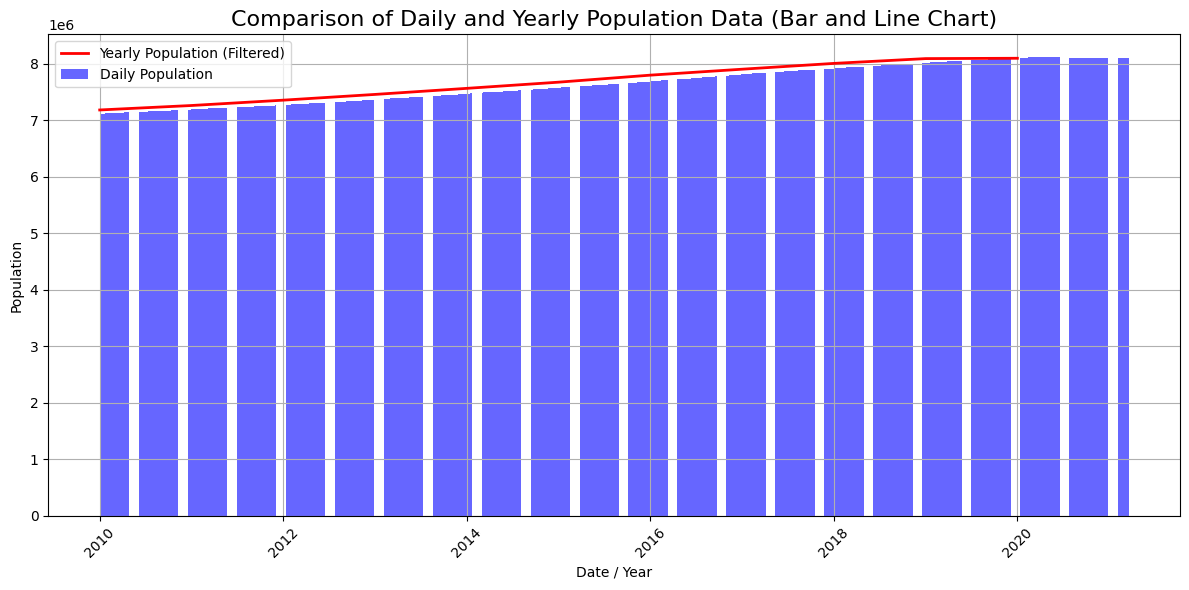

In [56]:
# -*- coding: utf-8 -*-
"""
Bar and Line Chart for Daily and Yearly Population History (Filtered)

Author: Manoj
"""

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the datasets
daily_population_path = '/content/Data/daily_pop_his.csv'
population_history_path = '/content/Data/PopHisNSW.csv'

# Load the daily population data
daily_population_data = pd.read_csv(daily_population_path)
daily_population_data['Date'] = pd.to_datetime(daily_population_data['Date'], errors='coerce')

# Load the population history data
population_history_data = pd.read_csv(population_history_path)
population_history_data['Year'] = pd.to_datetime(population_history_data['Year'], format='%Y')

# Step 2: Check the date ranges of both datasets
start_date_daily = daily_population_data['Date'].min()
end_date_daily = daily_population_data['Date'].max()
start_year_pop = population_history_data['Year'].min()
end_year_pop = population_history_data['Year'].max()

print(f"Daily population data range: {start_date_daily} to {end_date_daily}")
print(f"Yearly population history range: {start_year_pop} to {end_year_pop}")

# Step 3: Filter the yearly population data to match the date range of the daily data
filtered_population_history = population_history_data[
    (population_history_data['Year'] >= start_date_daily) & (population_history_data['Year'] <= end_date_daily)
]

# Print the first 5 rows of the filtered yearly population data
if len(filtered_population_history) > 0:
    print("First 5 rows of the filtered yearly population history:")
    print(filtered_population_history.head())
else:
    print("No data in the filtered yearly population history.")

print(f"Filtered yearly population history contains {len(filtered_population_history)} rows")

# Step 4: Create the figure and plot both daily and yearly data in the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Step 5: Plot the daily population data as a bar chart
ax1.bar(daily_population_data['Date'], daily_population_data['Population'], color='blue', label='Daily Population', alpha=0.6)

# Step 6: Plot the yearly population history data as a line chart on the same axis
if len(filtered_population_history) > 0:
    ax1.plot(filtered_population_history['Year'], filtered_population_history['Population'], color='red', label='Yearly Population (Filtered)', linewidth=2)

# Step 7: Add labels, title, and legend
ax1.set_title('Comparison of Daily and Yearly Population Data (Bar and Line Chart)', fontsize=16)
ax1.set_xlabel('Date / Year')
ax1.set_ylabel('Population')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax1.grid(True)

# Step 8: Display the plot
plt.tight_layout()
plt.show()


First Plot

In [65]:
# -*- coding: utf-8 -*-
"""
Daily Population Merging and Time Series Lag Features

Author: Manoj
"""

import pandas as pd

# Step 1: Load and Process ENSO Data
enso = pd.read_csv('/content/Data/daily_enso.csv', header=0)
enso['Date'] = pd.to_datetime(enso['DATE'])
enso.drop(columns=['DATE', 'SOI', 'SST_DIFF'], inplace=True)

# Step 2: Load and Process Humidity Data
hum = pd.read_csv('/content/Data/aggregated_humidity_data.csv', header=0)
hum['Date'] = pd.to_datetime(hum['Date'], dayfirst=True)
hum.drop(columns=['Time', 'median_humidity'], inplace=True)
hum = hum.groupby('Date').mean().sort_values(by='Date')

# Step 3: Load and Process Solar Radiation Data
rad = pd.read_csv('/content/Data/aggregated_solar_radiation_data.csv', header=0)
rad['Date'] = pd.to_datetime(rad['Date'], dayfirst=True)
rad.drop(columns=['Time', 'median_solar_radiation'], inplace=True)
rad = rad.groupby('Date').mean().sort_values(by='Date')

# Step 4: Load and Process Temperature Data
temp = pd.read_csv('/content/Data/aggregated_temperature_data.csv', header=0)
temp['Date'] = pd.to_datetime(temp['Date'], dayfirst=True)
temp.drop(columns=['Time', 'median_temp'], inplace=True)
temp = temp.groupby('Date').mean().sort_values(by='Date')

# Step 5: Load and Process Wind Direction Data
windtheta = pd.read_csv('/content/Data/aggregated_wind_direction_data.csv', header=0)
windtheta['Date'] = pd.to_datetime(windtheta['Date'], dayfirst=True)
windtheta.drop(columns=['Time', 'median_wind_direction'], inplace=True)
windtheta = windtheta.groupby('Date').mean().sort_values(by='Date')

# Step 6: Load and Process Windspeed Data
windspeed = pd.read_csv('/content/Data/aggregated_windspeed_data.csv', header=0)
windspeed['Date'] = pd.to_datetime(windspeed['Date'], dayfirst=True)
windspeed.drop(columns=['Time', 'median_windspeed'], inplace=True)
windspeed = windspeed.groupby('Date').mean().sort_values(by='Date')

# Step 7: Load and Process Rainfall Data
rain = pd.read_csv('/content/Data/median_rainfall_2010_2021.csv', header=0)
rain['Date'] = pd.to_datetime(rain['Date'])
rain.rename(columns={'Rainfall amount (millimetres)': 'rainfall'}, inplace=True)
rain = rain.sort_values(by='Date')

# Step 8: Load and Process Population Data
pop = pd.read_csv('/content/Data/daily_pop_nsw.csv', header=0)
pop['Date'] = pd.to_datetime(pop['Date'])
pop = pop.sort_values(by='Date')

# Decide how to model the population:
# Option 1: Use the same population for each day.
# Option 2: Interpolate the population for July 1st every year. Let's go with the assumption that you interpolate daily population.
# If already interpolated for daily, use as-is.

# Step 9: Load and Process Total Demand Data
demand = pd.read_csv('/content/Data/totaldemand_nsw.csv', header=0)
demand['Date'] = pd.to_datetime(demand['DATETIME'], dayfirst=True).dt.date
demand['Date'] = pd.to_datetime(demand['Date'])  # Convert back to datetime format
demand.drop(columns=['DATETIME'], inplace=True)
demand = demand.groupby('Date').mean().sort_values(by='Date')

# Step 10: Merge all datasets
join = pd.merge(hum, enso, on='Date', how='left')
join = pd.merge(join, rad, on='Date', how='left')
join = pd.merge(join, temp, on='Date', how='left')
join = pd.merge(join, windtheta, on='Date', how='left')
join = pd.merge(join, windspeed, on='Date', how='left')
join = pd.merge(join, rain, on='Date', how='left')
join = pd.merge(join, pop, on='Date', how='left')
join = pd.merge(join, demand, on='Date', how='left')

# Step 11: Handle missing values (optional strategy)
join = join.dropna()  # Drop rows with any missing values

# Step 12: Save as data_for_ml.csv
join.to_csv('/content/Data/data_for_ml.csv', index=False)

print("Final dataset 'data_for_ml.csv' created successfully!")



Final dataset 'data_for_ml.csv' created successfully!


Checking column: mean_temp
Missing values: 0, Infinite values: 0
Checking column: mean_humidity
Missing values: 0, Infinite values: 0
Checking column: mean_windspeed
Missing values: 0, Infinite values: 0
Checking column: TOTALDEMAND
Missing values: 0, Infinite values: 0
Checking column: Population
Missing values: 0, Infinite values: 0
Using device: cpu
Epoch 0/500, Loss: 68986824.0
Epoch 10/500, Loss: 14660742.0
Epoch 20/500, Loss: 1333752.875
Epoch 30/500, Loss: 357249.25
Epoch 40/500, Loss: 178746.71875
Epoch 50/500, Loss: 206760.890625
Epoch 60/500, Loss: 202012.25
Epoch 70/500, Loss: 123802.5234375
Epoch 80/500, Loss: 298692.71875
Epoch 90/500, Loss: 180766.5625
Epoch 100/500, Loss: 331472.21875
Epoch 110/500, Loss: 338573.90625
Epoch 120/500, Loss: 168516.046875
Epoch 130/500, Loss: 197212.296875
Epoch 140/500, Loss: 188454.5625
Epoch 150/500, Loss: 177780.4375
Epoch 160/500, Loss: 177876.984375
Epoch 170/500, Loss: 313998.46875
Epoch 180/500, Loss: 211510.34375
Epoch 190/500, Los

INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can c

Epoch 400/500, Loss: 121705.0703125
Epoch 410/500, Loss: 122946.203125
Epoch 420/500, Loss: 275084.625
Epoch 430/500, Loss: 102153.3515625
Epoch 440/500, Loss: 166833.8125
Epoch 450/500, Loss: 213871.765625
Epoch 460/500, Loss: 243877.40625
Epoch 470/500, Loss: 227250.953125
Epoch 480/500, Loss: 288194.90625
Epoch 490/500, Loss: 399857.375
Train MSE: 212619.328125
Test MSE: 320780.34375


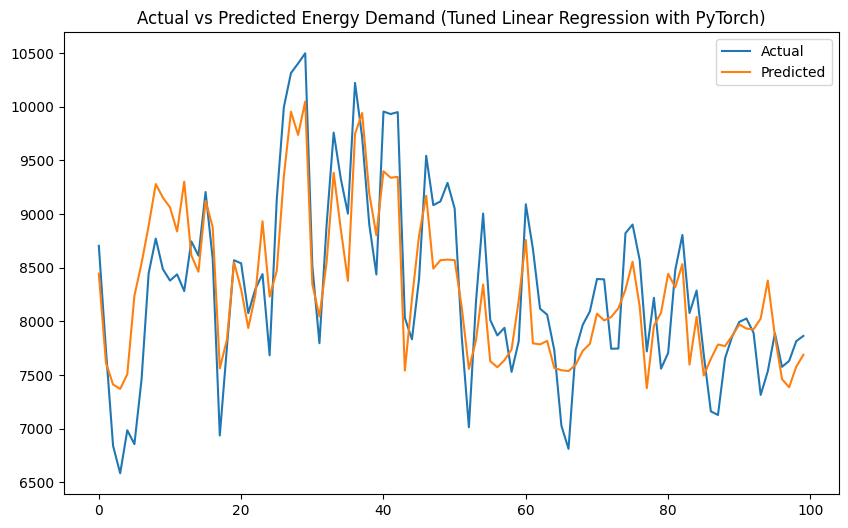

In [68]:
# -*- coding: utf-8 -*-
"""
Energy Demand Prediction Model (Linear Regression with PyTorch, Tuned)

Author: Manoj
"""

import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Load Preprocessed Data
data_path = '/content/Data/data_for_ml.csv'  # Update the path based on your file
preprocessed_data = pd.read_csv(data_path)

# Step 2: Check for missing or infinite values in the dataset
def check_data_issues(data, columns):
    for col in columns:
        print(f"Checking column: {col}")
        missing_vals = data[col].isnull().sum()
        infinite_vals = np.isinf(data[col]).sum()
        print(f"Missing values: {missing_vals}, Infinite values: {infinite_vals}")
        if missing_vals > 0 or infinite_vals > 0:
            print(f"Column '{col}' contains issues and should be handled.")

columns_to_check = [
    'mean_temp', 'mean_humidity', 'mean_windspeed',
    'TOTALDEMAND', 'Population'
]
check_data_issues(preprocessed_data, columns_to_check)

# Step 3: Prepare data for PyTorch model training
features = [
    'mean_temp', 'mean_humidity', 'mean_windspeed',
    'Population'
]
X = preprocessed_data[features].values
y = preprocessed_data['TOTALDEMAND'].values

# Step 4: Normalize the data to stabilize training
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 5: Split the data into training and test sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 6: Move data to GPU or CPU using PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Convert data to tensors and move to the chosen device (CPU or GPU)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Step 7: Define the PyTorch Linear Regression Model with additional layer
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.layer3(x)

# Step 8: Initialize model, optimizer, and loss function
model = LinearRegressionModel(X_train_tensor.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Increase learning rate
loss_fn = nn.MSELoss()

# Step 9: Initialize weights using Xavier initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

model.apply(init_weights)

# Step 10: Train the model with increased epochs and mini-batch gradient descent
def train_model(model, X_train, y_train, optimizer, loss_fn, batch_size=64, epochs=100):
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model.train()
    for epoch in range(epochs):
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            y_pred = model(batch_X)
            loss = loss_fn(y_pred, batch_y)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

train_model(model, X_train_tensor, y_train_tensor, optimizer, loss_fn, epochs=500)

# Step 11: Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)

    train_mse = loss_fn(y_pred_train, y_train_tensor).item()
    test_mse = loss_fn(y_pred_test, y_test_tensor).item()

    print(f'Train MSE: {train_mse}')
    print(f'Test MSE: {test_mse}')

# Step 12: Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_tensor.cpu().numpy()[:100], label='Actual')
plt.plot(y_pred_test.cpu().numpy()[:100], label='Predicted')
plt.title('Actual vs Predicted Energy Demand (Tuned Linear Regression with PyTorch)')
plt.legend()
plt.show()
